# DBSCANを使って高密度の領域を特定する

1. 未訪問の点 pを選ぶ。
2. p が コア点であれば、新しいクラスタを作り、ε近傍にある点すべてをそのクラスタに追加。
3. クラスタに追加された各点が さらにコア点ならば、その点のε近傍も再帰的にクラスタに追加。
4. 境界点はクラスタに含まれるが、そこからは拡張されない。  

よって、密度の高い領域は 同一クラスタにまとめられる。密度が低い点（孤立点）は ノイズとして無視される。  
故にクラスタに属さない点も存在しうる。

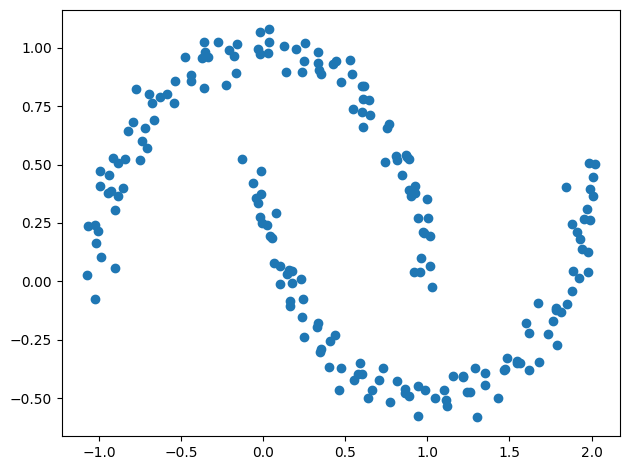

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
# plt.savefig('./figures/moons.png', dpi=300)
plt.show()

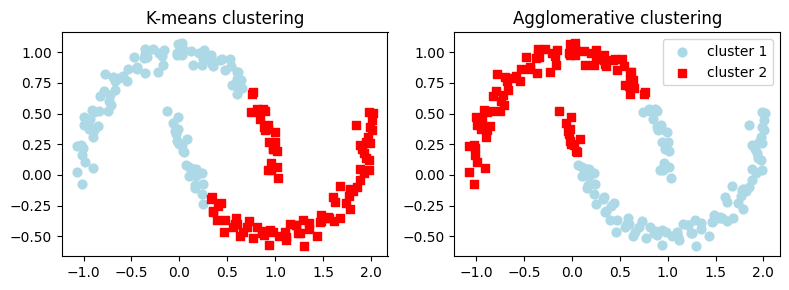

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

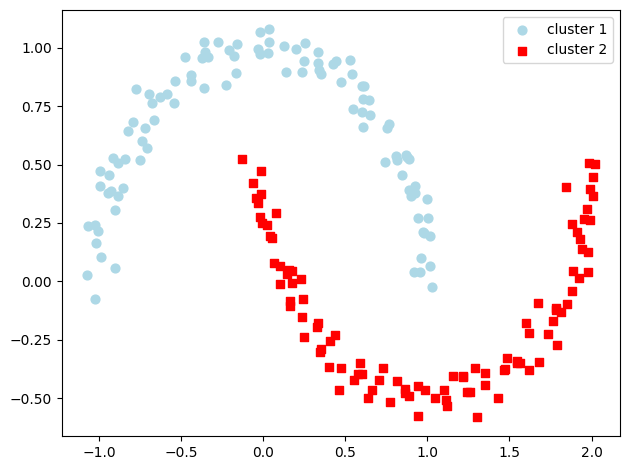

In [3]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('./figures/moons_dbscan.png', dpi=300)
plt.show()

ハイパラ調整がむずい。次元の呪いの影響を受け、空間がスカスカになる可能性もある。  
次元の呪いに関しては、クラスタリングを実行する前に次元削減の手法を適用するのが一般的である。（例：PCA, t-SNE）

他にもクラスタリングアルゴリズムにグラフベースのクラスタリングなどがあり、スペクトルクラスタリングアルゴリズムが最もよく知られている。